In [3]:
import pandas as pd
import gensim
import gensim.corpora as corpora
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt

# Zorg dat je de stopwoorden downloadt
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = pd.read_csv("../data/opendata-tk/combined_speeches_2014-2024.csv")

In [5]:
df.head()

,file_id,speaker_name,speaker_party,speech_text,jaar,date,kamer,category,title,document_number,url,meta_url,vergadernummer
0,h-tk-20152016-52-16,De voorzitter,NaN,"De motie-Gesthuizen/Kerstens (\nDe Kamer,\ngeh...",2015-2016,2016-02-09,tk,handelingen,16 Stemmingen moties Raad voor het concurrenti...,NaN,https://zoek.officielebekendmakingen.nl/h-tk-2...,https://zoek.officielebekendmakingen.nl/h-tk-2...,"nr. 52, item 16"
1,h-tk-20152016-52-16,De voorzitter,NaN,Ik constateer dat de aanwezige leden van de fr...,2015-2016,2016-02-09,tk,handelingen,16 Stemmingen moties Raad voor het concurrenti...,NaN,https://zoek.officielebekendmakingen.nl/h-tk-2...,https://zoek.officielebekendmakingen.nl/h-tk-2...,"nr. 52, item 16"
2,h-tk-20152016-68-6,De voorzitter,NaN,Op de tafel van de Griffier ligt een lijst van...,2015-2016,2016-03-23,tk,handelingen,6 Mededelingen,NaN,https://zoek.officielebekendmakingen.nl/h-tk-2...,https://zoek.officielebekendmakingen.nl/h-tk-2...,"nr. 68, item 6"
3,h-tk-20152016-75-13-n1,De voorzitter,NaN,"In stemming komt de motie-Lucas (31524, nr. 28...",2015-2016,2016-04-12,tk,handelingen,13 Stemming motie Ontwerpbesluit experiment cr...,NaN,https://zoek.officielebekendmakingen.nl/h-tk-2...,https://zoek.officielebekendmakingen.nl/h-tk-2...,"nr. 75, item 13"
4,h-tk-20152016-75-13-n1,De heer Bisschop,SGP,Voorzitter. Wij helpen gaarne om het vaderland...,2015-2016,2016-04-12,tk,handelingen,13 Stemming motie Ontwerpbesluit experiment cr...,NaN,https://zoek.officielebekendmakingen.nl/h-tk-2...,https://zoek.officielebekendmakingen.nl/h-tk-2...,"nr. 75, item 13"


In [6]:
df.columns

Index(['file_id', 'speaker_name', 'speaker_party', 'speech_text', 'jaar',
       'date', 'kamer', 'category', 'title', 'document_number', 'url',
       'meta_url', 'vergadernummer'],
      dtype='object')

In [7]:
# Convert 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Controleer het resultaat
print(df.dtypes)

file_id                    object
speaker_name               object
speaker_party              object
speech_text                object
jaar                       object
date               datetime64[ns]
kamer                      object
category                   object
title                      object
document_number           float64
url                        object
meta_url                   object
vergadernummer             object
dtype: object


In [8]:
import re

def clean_text(text):
    if isinstance(text, str):  # Controleer of het geen NaN is
        text = text.lower()  # Converteer naar kleine letters
        text = re.sub(r'\n', ' ', text)  # Vervang nieuwe regels door spaties
        text = re.sub(r'\d+', '', text)  # Verwijder cijfers
        text = re.sub(r'[^\w\s]', '', text)  # Verwijder leestekens
        return text
    return ""

df["speech_text"] = df["speech_text"].apply(clean_text)


In [9]:
nltk.download("stopwords")
stop_words = set(stopwords.words("dutch"))

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df["speech_text"] = df["speech_text"].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('punkt')  # Adjust the path if needed



[nltk_data] Downloading package punkt to
[nltk_data]     C:/Users/gabri/OneDrive/Documents/Second
[nltk_data]     semester/Tweede kamerleden/Coding...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import spacy

# Install model if needed: python -m spacy download nl_core_news_sm
nlp = spacy.load("nl_core_news_sm")  # Dutch tokenizer
text = "Dit is een testzin. Hoe gaat het vandaag?"
tokens = [token.text for token in nlp(text)]
print(tokens)


['Dit', 'is', 'een', 'testzin', '.', 'Hoe', 'gaat', 'het', 'vandaag', '?']


C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


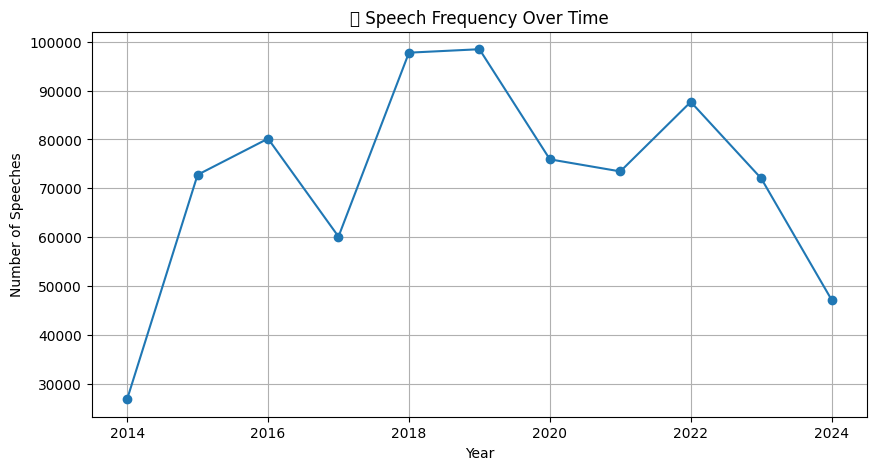

In [11]:
import matplotlib.pyplot as plt

df["year"] = df["date"].dt.year
speech_counts = df.groupby("year").size()

plt.figure(figsize=(10,5))
plt.plot(speech_counts.index, speech_counts.values, marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Number of Speeches")
plt.title("📊 Speech Frequency Over Time")
plt.grid()
plt.show()


**Notes speech frequency graph** 

It is noticable and interesting for us when the most activity took place within this combined speeches dataset

C:\Users\gabri\AppData\Local\Temp\ipykernel_14880\2956785628.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_time_series = df.resample("M", on="date")[list(keywords.keys())].sum()
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


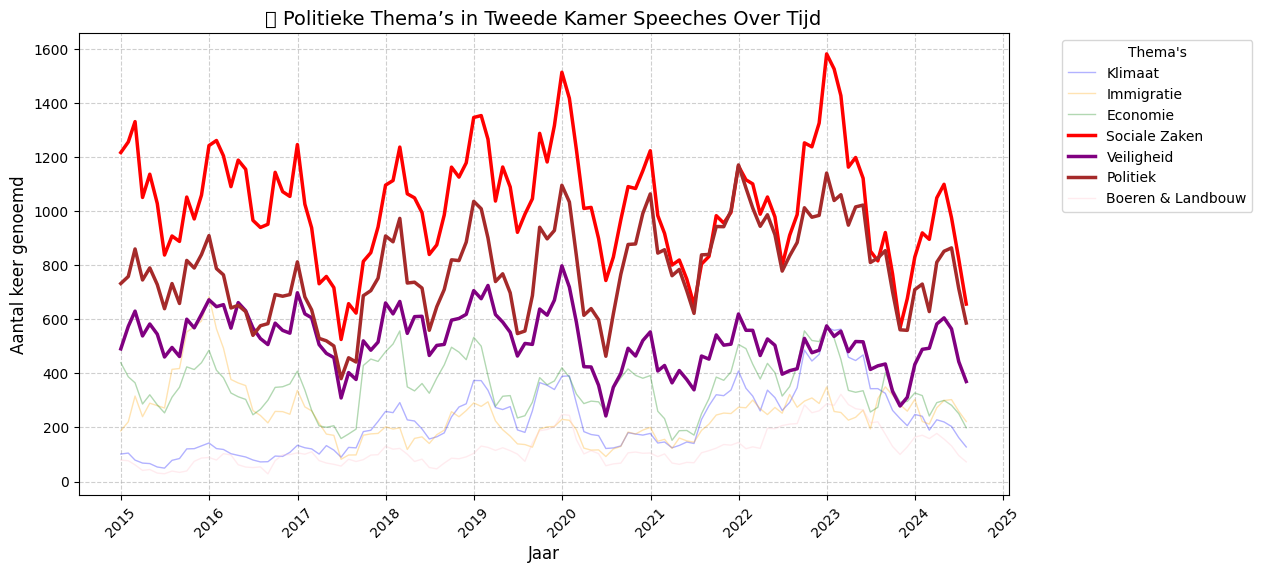

In [12]:

# 🔹 Define keywords per political theme
keywords = {
    "Klimaat": ["klimaat", "klimaatverandering", "duurzaamheid", "energietransitie", "CO2", "stikstof"],
    "Immigratie": ["asiel", "migratie", "vluchtelingen", "integratie", "immigratiebeleid", "opvang"],
    "Economie": ["economie", "werkloosheid", "minimumloon", "koopkracht", "inflatie", "belasting", "woningmarkt"],
    "Sociale Zaken": ["zorg", "onderwijs", "pensioen", "sociale zekerheid", "jeugdzorg", "woningtekort"],
    "Veiligheid": ["criminaliteit", "drugsbeleid", "veiligheid", "cybercriminaliteit", "politie", "rechtstaat"],
    "Politiek": ["democratie", "kabinet", "verkiezingen", "coalitie", "oppositie", "Rutte", "Tweede Kamer", "Europese Unie"],
    "Boeren & Landbouw": ["boeren", "landbouw", "stikstofbeleid", "veeindustrie", "natuurbeleid"]
}

# 🔹 Count keyword occurrences per speech
for category, words in keywords.items():
    df[category] = df["speech_text"].apply(lambda x: sum(word in str(x).lower() for word in words))

# 🔹 Aggregate monthly counts
df_time_series = df.resample("M", on="date")[list(keywords.keys())].sum()

# 🔹 Smooth data using a 6-month moving average
df_smoothed = df_time_series.rolling(window=6, center=True).mean()

# 🔹 Identify the top 3 most mentioned themes
top_3_topics = df_smoothed.sum().nlargest(3).index.tolist()

# 🔹 Plot the improved graph
plt.figure(figsize=(12, 6))

# Define colors for better visualization
colors = {
    "Klimaat": "blue",
    "Immigratie": "orange",
    "Economie": "green",
    "Sociale Zaken": "red",
    "Veiligheid": "purple",
    "Politiek": "brown",
    "Boeren & Landbouw": "pink"
}

# Plot all topics but dim less relevant ones
for category in keywords.keys():
    if category in top_3_topics:
        plt.plot(df_smoothed.index, df_smoothed[category], label=category, color=colors[category], linewidth=2.5)
    else:
        plt.plot(df_smoothed.index, df_smoothed[category], label=category, color=colors[category], alpha=0.3, linewidth=1)

# 🔹 Styling
plt.xlabel("Jaar", fontsize=12)
plt.ylabel("Aantal keer genoemd", fontsize=12)
plt.title("📊 Politieke Thema’s in Tweede Kamer Speeches Over Tijd", fontsize=14)
plt.legend(title="Thema's", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


**Notes topic analysis based on keywords**

This graph might provide a general idea of topics but the keywords are too broad to draw actual conclusions 

This graph is very limited. 

,1st,2nd,3rd,4th,5th
year,,,,,
2014,Minister Rutte,Staatssecretaris Van Rijn,Mevrouw Schouten,De heer Jasper van Dijk,Staatssecretaris Dijksma
2015,Minister Rutte,Minister Kamp,De heer Pechtold,Minister Van der Steur,Staatssecretaris Van Rijn
2016,Minister Van der Steur,Minister Rutte,Staatssecretaris Van Rijn,Minister Kamp,Mevrouw Van Tongeren
2017,Minister Rutte,Mevrouw Leijten,Minister Blok,De heer Van Rooijen,Minister Kamp
2018,Minister Rutte,Minister Wiebes,Minister Hoekstra,De heer Baudet,Mevrouw Leijten
2019,Minister Rutte,De heer Baudet,Mevrouw Ouwehand,Minister Schouten,Minister Grapperhaus
2020,Minister Rutte,Minister De Jonge,De heer Wilders,De heer Baudet,De heer Azarkan
2021,Minister De Jonge,Rutte,Mevrouw Van der Plas,De heer Wilders,De heer Azarkan
2022,Mevrouw Van der Plas,Minister Rutte,De heer Omtzigt,Minister Kuipers,De heer Van Haga


C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


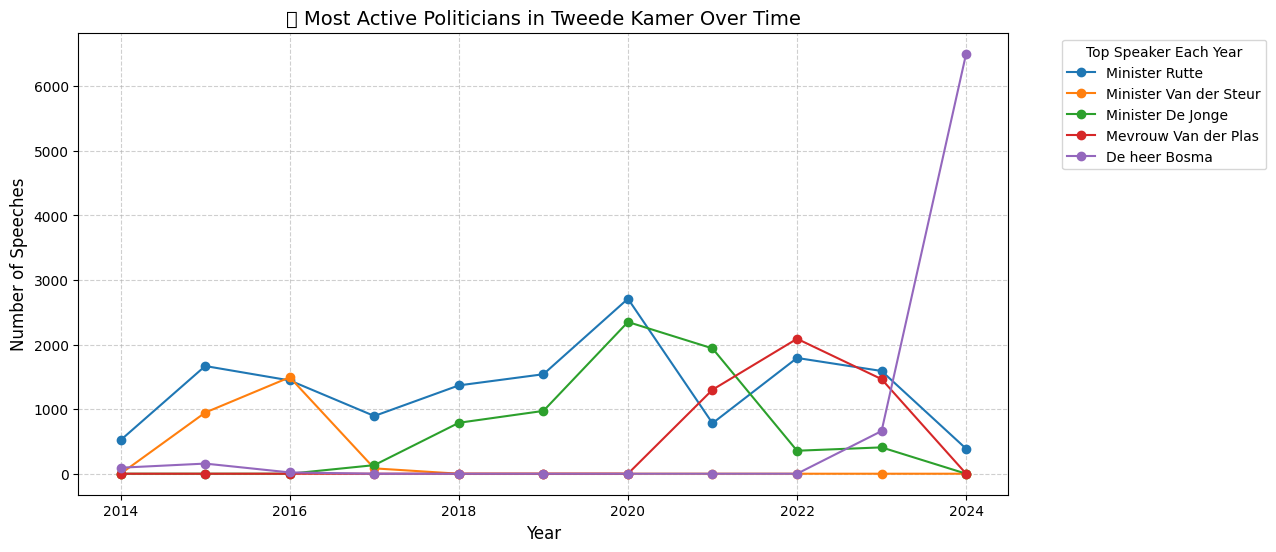

In [ ]:
# 🔹 Ensure 'speaker_name' column exists and remove "De voorzitter" (chairperson)
df = df[df["speaker_name"] != "De voorzitter"]

# 🔹 Aggregate number of speeches per politician per year
df["year"] = df["date"].dt.year
speaker_counts = df.groupby(["year", "speaker_name"]).size().unstack(fill_value=0)

# 🔹 Find the top 5 most active speakers per year
top_speakers_per_year = speaker_counts.apply(lambda x: x.nlargest(5).index.tolist(), axis=1)

# 🔹 Convert to a structured DataFrame for display
df_top_speakers = pd.DataFrame(top_speakers_per_year.to_list(), index=top_speakers_per_year.index, columns=["1st", "2nd", "3rd", "4th", "5th"])

# 🔹 Display the results in Jupyter Notebook
from IPython.display import display
display(df_top_speakers)  # Shows the top speakers per year in a table

# 🔹 Plot the top speaker trend over time
plt.figure(figsize=(12, 6))
for speaker in df_top_speakers["1st"].unique():  # Only plot the #1 speaker per year
    if speaker in speaker_counts.columns:
        plt.plot(speaker_counts.index, speaker_counts[speaker], marker="o", label=speaker)

plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Speeches", fontsize=12)
plt.title("🗣 Most Active Politicians in Tweede Kamer Over Time", fontsize=14)
plt.legend(title="Top Speaker Each Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

<Figure size 1200x600 with 0 Axes>

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


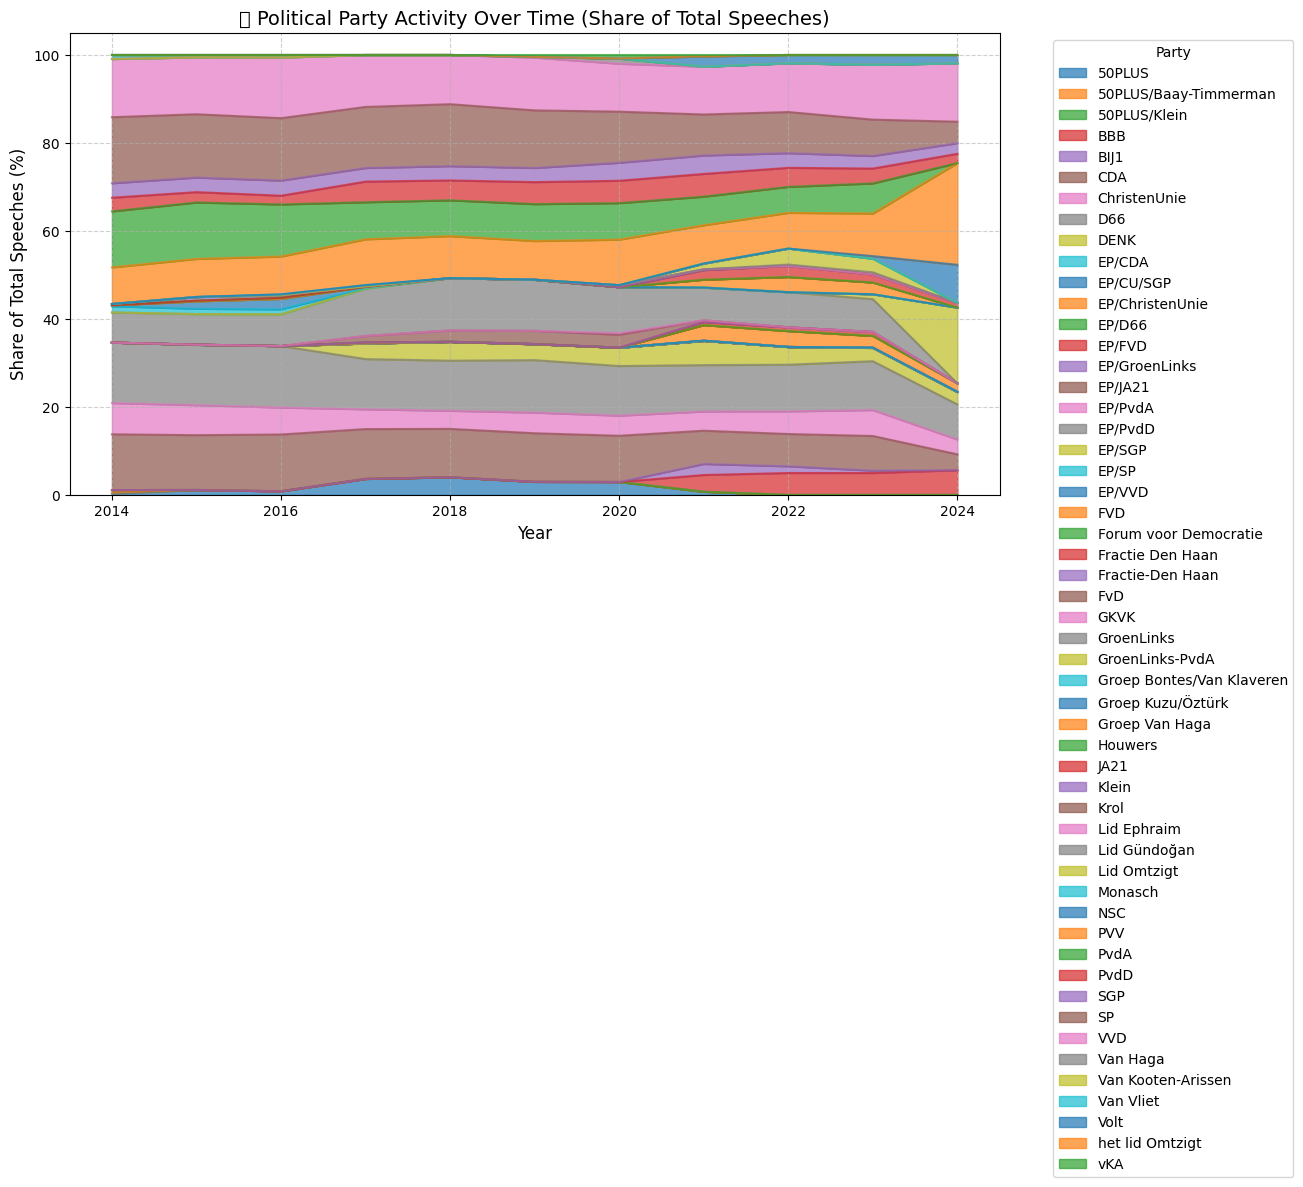

In [15]:

# Remove missing party names
df = df.dropna(subset=["speaker_party"])

# Aggregate number of speeches per party per year
df["year"] = df["date"].dt.year
party_counts = df.groupby(["year", "speaker_party"]).size().unstack(fill_value=0)

# Normalize party activity to percentages per year
party_shares = party_counts.div(party_counts.sum(axis=1), axis=0) * 100

# Plot stacked area chart
plt.figure(figsize=(12, 6))
party_shares.plot(kind="area", stacked=True, alpha=0.7, figsize=(12,6))

plt.xlabel("Year", fontsize=12)
plt.ylabel("Share of Total Speeches (%)", fontsize=12)
plt.title("📊 Political Party Activity Over Time (Share of Total Speeches)", fontsize=14)
plt.legend(title="Party", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


**Notes very elaborated graph** 

This graph is a bit too chaotic to read**

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


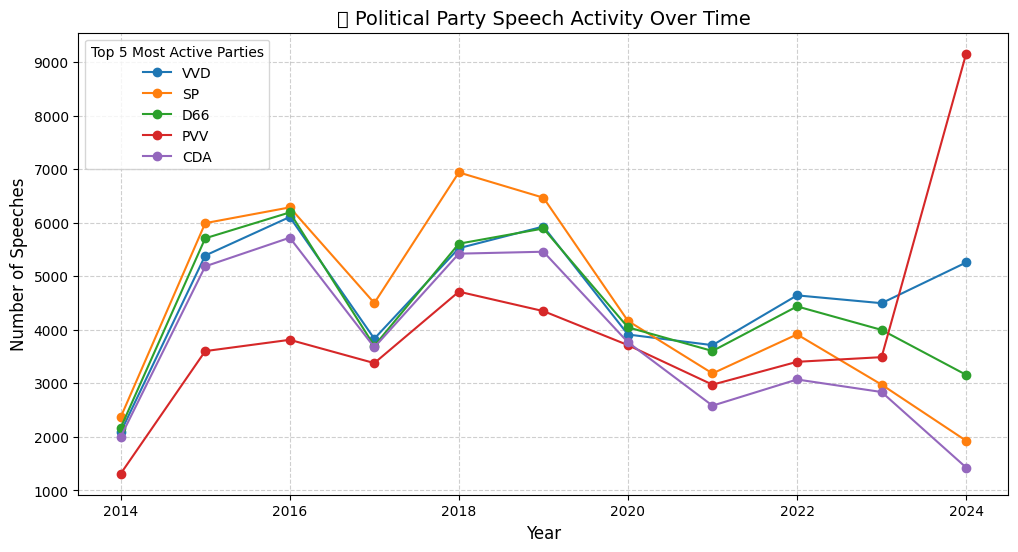

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the top 5 parties that spoke the most across all years
top_parties = party_counts.sum().nlargest(5).index

plt.figure(figsize=(12, 6))

for party in top_parties:
    plt.plot(party_counts.index, party_counts[party], marker="o", linestyle="-", label=party)

plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Speeches", fontsize=12)
plt.title("📊 Political Party Speech Activity Over Time", fontsize=14)
plt.legend(title="Top 5 Most Active Parties")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


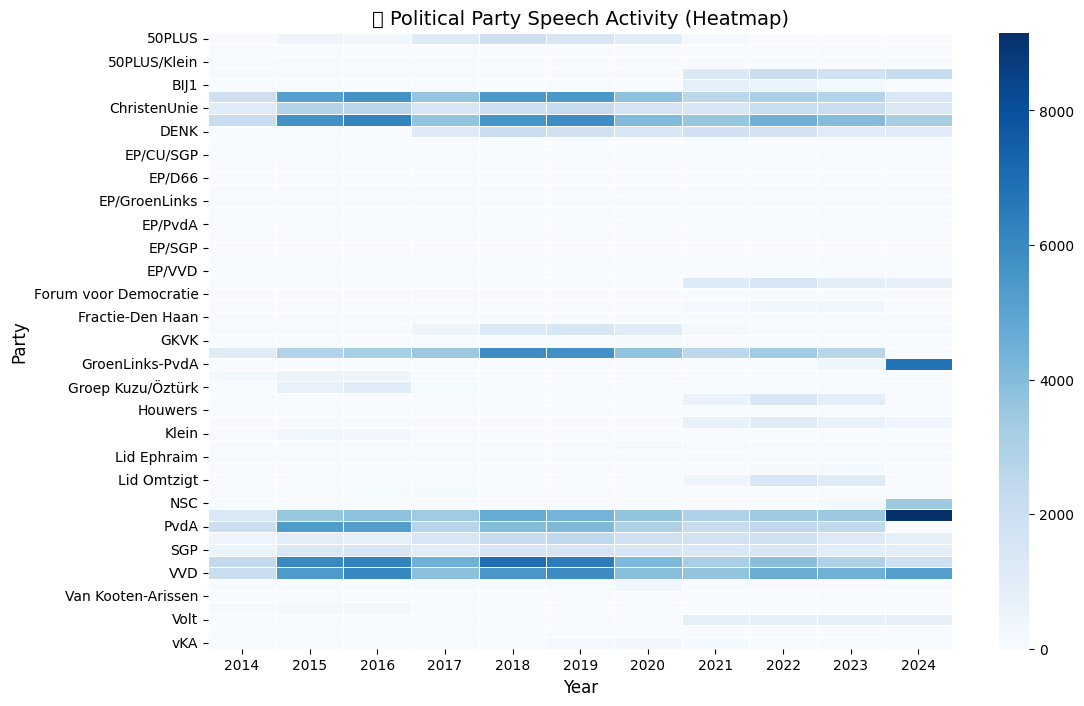

In [17]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(party_counts.T, cmap="Blues", annot=False, linewidths=0.5)

plt.xlabel("Year", fontsize=12)
plt.ylabel("Party", fontsize=12)
plt.title("🔥 Political Party Speech Activity (Heatmap)", fontsize=14)
plt.show()


**Notes heatmap**


It is interesting for us too see which party is very active during which period of time 

This heatmap provides an visually appealing overview of the parties 

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127963 (\N{CLASSICAL BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


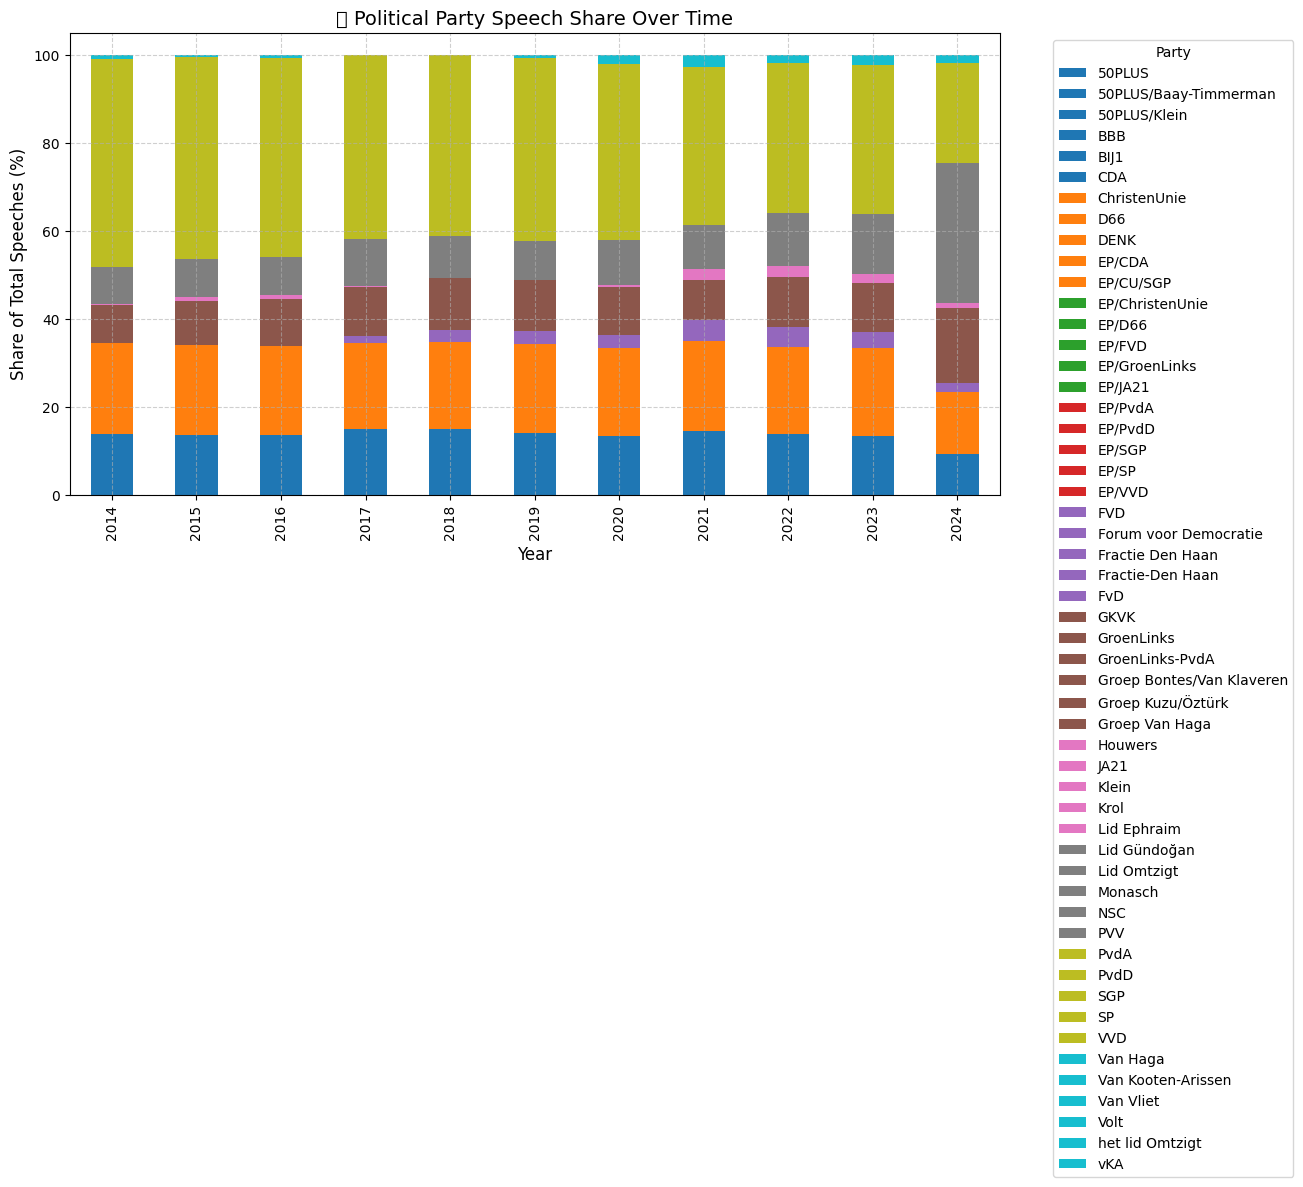

In [18]:
party_counts_pct = party_counts.div(party_counts.sum(axis=1), axis=0) * 100  # Convert to percentage

party_counts_pct.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")

plt.xlabel("Year", fontsize=12)
plt.ylabel("Share of Total Speeches (%)", fontsize=12)
plt.title("🏛 Political Party Speech Share Over Time", fontsize=14)
plt.legend(title="Party", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<Figure size 1200x600 with 0 Axes>

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127963 (\N{CLASSICAL BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


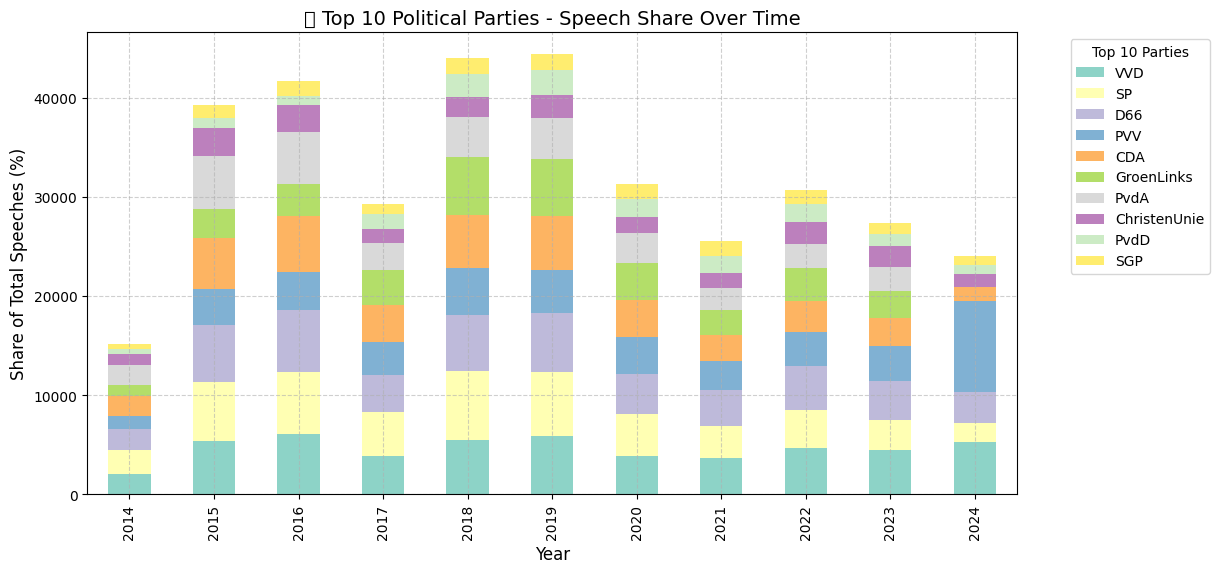

In [20]:


# Remove missing party names
df = df.dropna(subset=["speaker_party"])

# Aggregate number of speeches per party per year
df["year"] = df["date"].dt.year
party_counts = df.groupby(["year", "speaker_party"]).size().unstack(fill_value=0)

# Get the Top 10 most active parties
top_parties = party_counts.sum().nlargest(10).index
party_counts_filtered = party_counts[top_parties]

# Sort parties so the most active one is at the bottom
party_counts_filtered = party_counts_filtered[sorted(top_parties, key=lambda x: party_counts[x].sum(), reverse=True)]

# Plot improved stacked bar chart
plt.figure(figsize=(12, 6))
party_counts_filtered.plot(kind="bar", stacked=True, figsize=(12,6), colormap="Set3")

plt.xlabel("Year", fontsize=12)
plt.ylabel("Share of Total Speeches (%)", fontsize=12)
plt.title("🏛 Top 10 Political Parties - Speech Share Over Time", fontsize=14)
plt.legend(title="Top 10 Parties", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


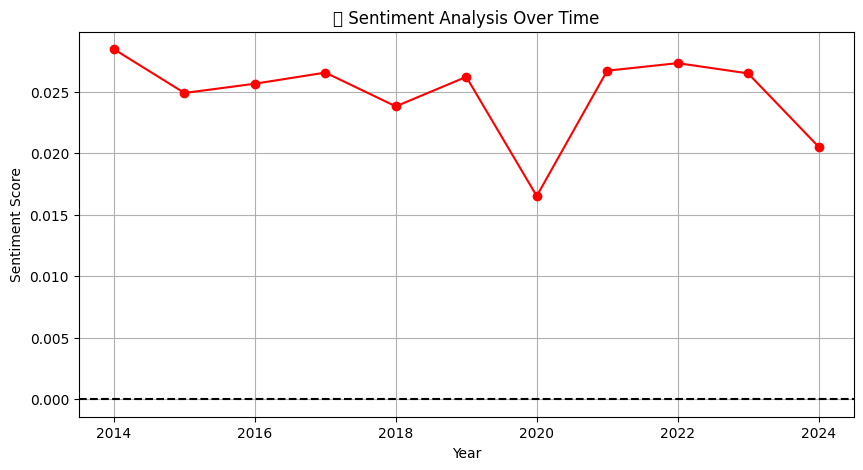

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
df["sentiment"] = df["speech_text"].apply(lambda text: sia.polarity_scores(str(text))["compound"])

df_sentiment = df.groupby("year")["sentiment"].mean()

plt.figure(figsize=(10,5))
plt.plot(df_sentiment.index, df_sentiment.values, marker="o", linestyle="-", color="red")
plt.axhline(y=0, color="black", linestyle="--")  # Neutral line
plt.xlabel("Year")
plt.ylabel("Sentiment Score")
plt.title("📊 Sentiment Analysis Over Time")
plt.grid()
plt.show()


**Possible explanations for sentiment analysis:**

See the recovery after the financial crisis: after 2018 
 
A possible explanation for the drop in 2020 can be the toeslaggenaffaire and COVID pandemix 
